

### Import necessary libraries and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [4]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [5]:
# Apple Inc. (AAPL), Sector: Technology
# Tesla Inc. (TSLA), Sector: Automotive/Electric Vehicles
# Amazon.com Inc. (AMZN), Sector: E-commerce/Technology
# NVIDIA Corporation (NVDA), Sector: Semiconductors/Technology
stocks_list = ['AAPL', 'TSLA', 'AMZN', 'NVDA', 'KPOP', 'V']

# Set up End and Start times for data grab
end = datetime.now()
# Look back for 3 years
start = datetime(end.year - 3, end.month, end.day)

for stock in stocks_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, TSLA, AMZN, NVDA, KPOP, V]
company_name = ['APPLE', 'TESLA', 'AMAZON', 'NVIDIA', 'KPOP-ETF', 'VISA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-05-24,126.010002,127.940002,125.940002,127.099998,124.964172,63092900,APPLE
2021-05-25,127.820000,128.320007,126.320000,126.900002,124.767532,72009500,APPLE
2021-05-26,126.959999,127.389999,126.419998,126.849998,124.718369,56575900,APPLE
2021-05-27,126.440002,127.639999,125.080002,125.279999,123.174744,94625600,APPLE
2021-05-28,125.570000,125.800003,124.550003,124.610001,122.516014,71311100,APPLE
2021-06-01,125.080002,125.349998,123.940002,124.279999,122.191559,67637100,APPLE
2021-06-02,124.279999,125.239998,124.050003,125.059998,122.958450,59278900,APPLE
2021-06-03,124.680000,124.849998,123.129997,123.540001,121.463989,76229200,APPLE
2021-06-04,124.070000,126.160004,123.849998,125.889999,123.774513,75169300,APPLE


### Data Exploration
- 1. What is the historical price trend of the stock?

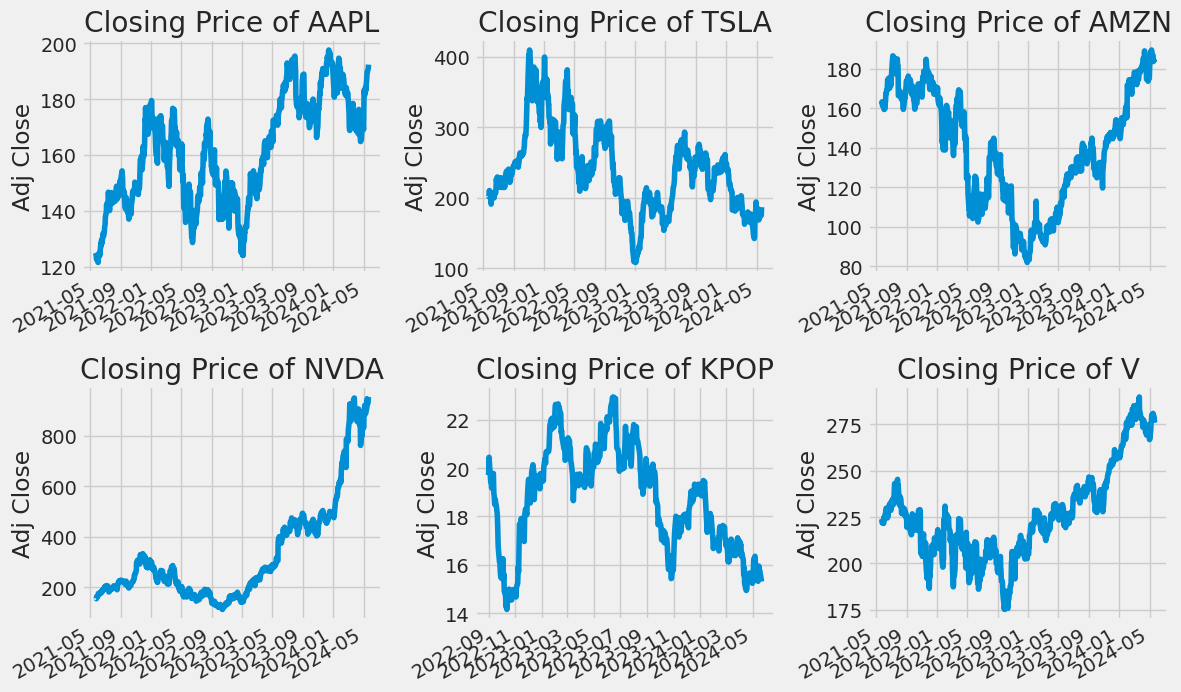

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks_list[i - 1]}")

plt.tight_layout()

- 2. Calculate daily returns to see how bout was the daily return of the stock on average?
- 2.1 Histogram

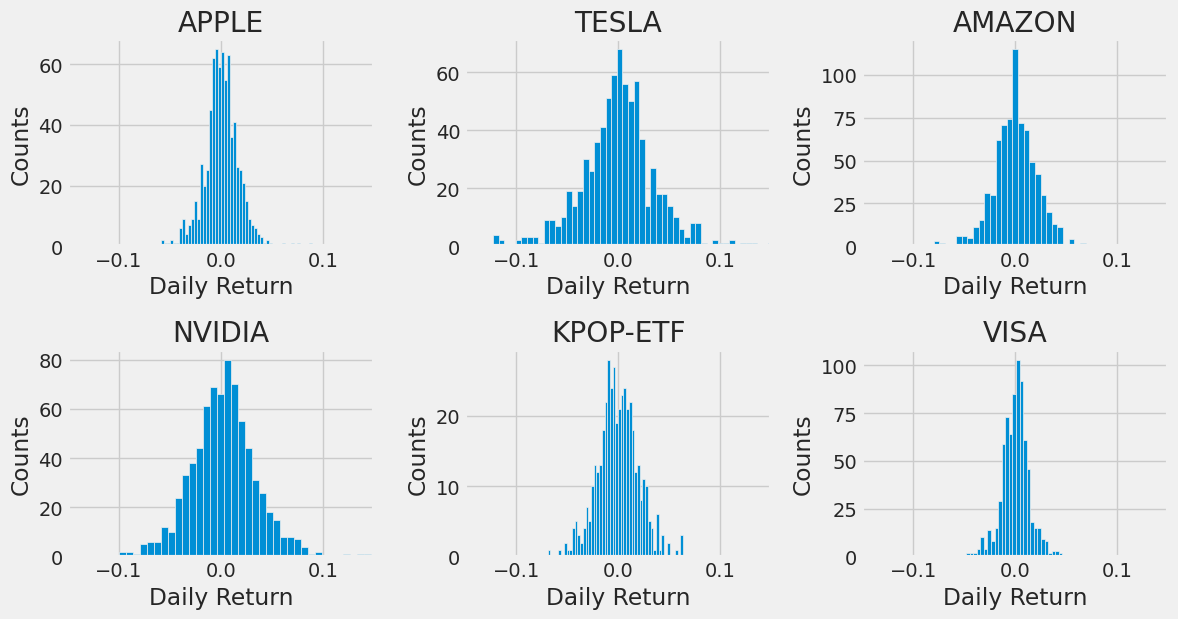

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    # Set x-limit for the histogram
    plt.gca().set_xlim(-0.15, 0.15)  # Adjust the x-limit as needed

plt.tight_layout()

- 2.2 (Scatter) Compare daily return between stocks

In [8]:
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [9]:
# Create a figure to visualize the daily returns
for company in company_list:
    company['Daily_Return'] = company['Adj Close'].pct_change()

fig = go.Figure()

fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Daily_Return'],
                         mode='lines', name='Apple', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Daily_Return'],
                         mode='lines', name='Amazon', line=dict(color='green')))

fig.add_trace(go.Scatter(x=TSLA.index, y=TSLA['Daily_Return'],
                         mode='lines', name='Tesla', line=dict(color='red')))


fig.update_layout(title='Daily Returns for Apple, Amazon and Tesla',
                  xaxis_title='Date', yaxis_title='Daily Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

- 2.3 Calculate historical volatility (standard deviation of daily returns)

In [10]:
# Calculate historical volatility (standard deviation of daily returns)

# Calculate historical volatility (standard deviation of daily returns)
apple_volatility  = AAPL['Daily_Return'].std()
amazon_volatility = AMZN['Daily_Return'].std()
tesla_volatility  = TSLA['Daily_Return'].std()
nvidia_volatility = NVDA['Daily_Return'].std()
kpop_volatility   = KPOP['Daily_Return'].std()
visa_volatility   = V['Daily_Return'].std()

# Create a figure to compare volatility
fig1 = go.Figure()
fig1.add_bar(x=['Apple', 'Amazon', 'Tesla', 'Nvidia', 'Kpop', 'Visa'],
             y=[apple_volatility, amazon_volatility, tesla_volatility, nvidia_volatility, kpop_volatility, visa_volatility],
             text=[f'{apple_volatility:.4f}', f'{amazon_volatility:.4f}', f'{tesla_volatility:.4f}', f'{nvidia_volatility:.4f}', f'{kpop_volatility:.4f}', f'{visa_volatility:.4f}'],
             textposition='auto', marker=dict(color=['blue', 'green', 'red', 'gold', 'purple', 'sandybrown']))

fig1.update_layout(title='Volatility Comparison',
                   xaxis_title='Stock', yaxis_title='Volatility (Standard Deviation)',
                   bargap=0.5)
fig1.show()

### 3. What was the correlation between different stocks closing prices?

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(stocks_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,AMZN,KPOP,NVDA,TSLA,V
Date,,,,,,
2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-25,-0.001574,0.004333,NaN,0.002290,-0.002886,-0.001308
2021-05-26,-0.000394,0.001875,NaN,0.003339,0.023880,-0.008514
2021-05-27,-0.012377,-0.010735,NaN,-0.013503,0.018930,-0.000925
2021-05-28,-0.005348,-0.002179,NaN,0.048844,-0.008925,0.001939


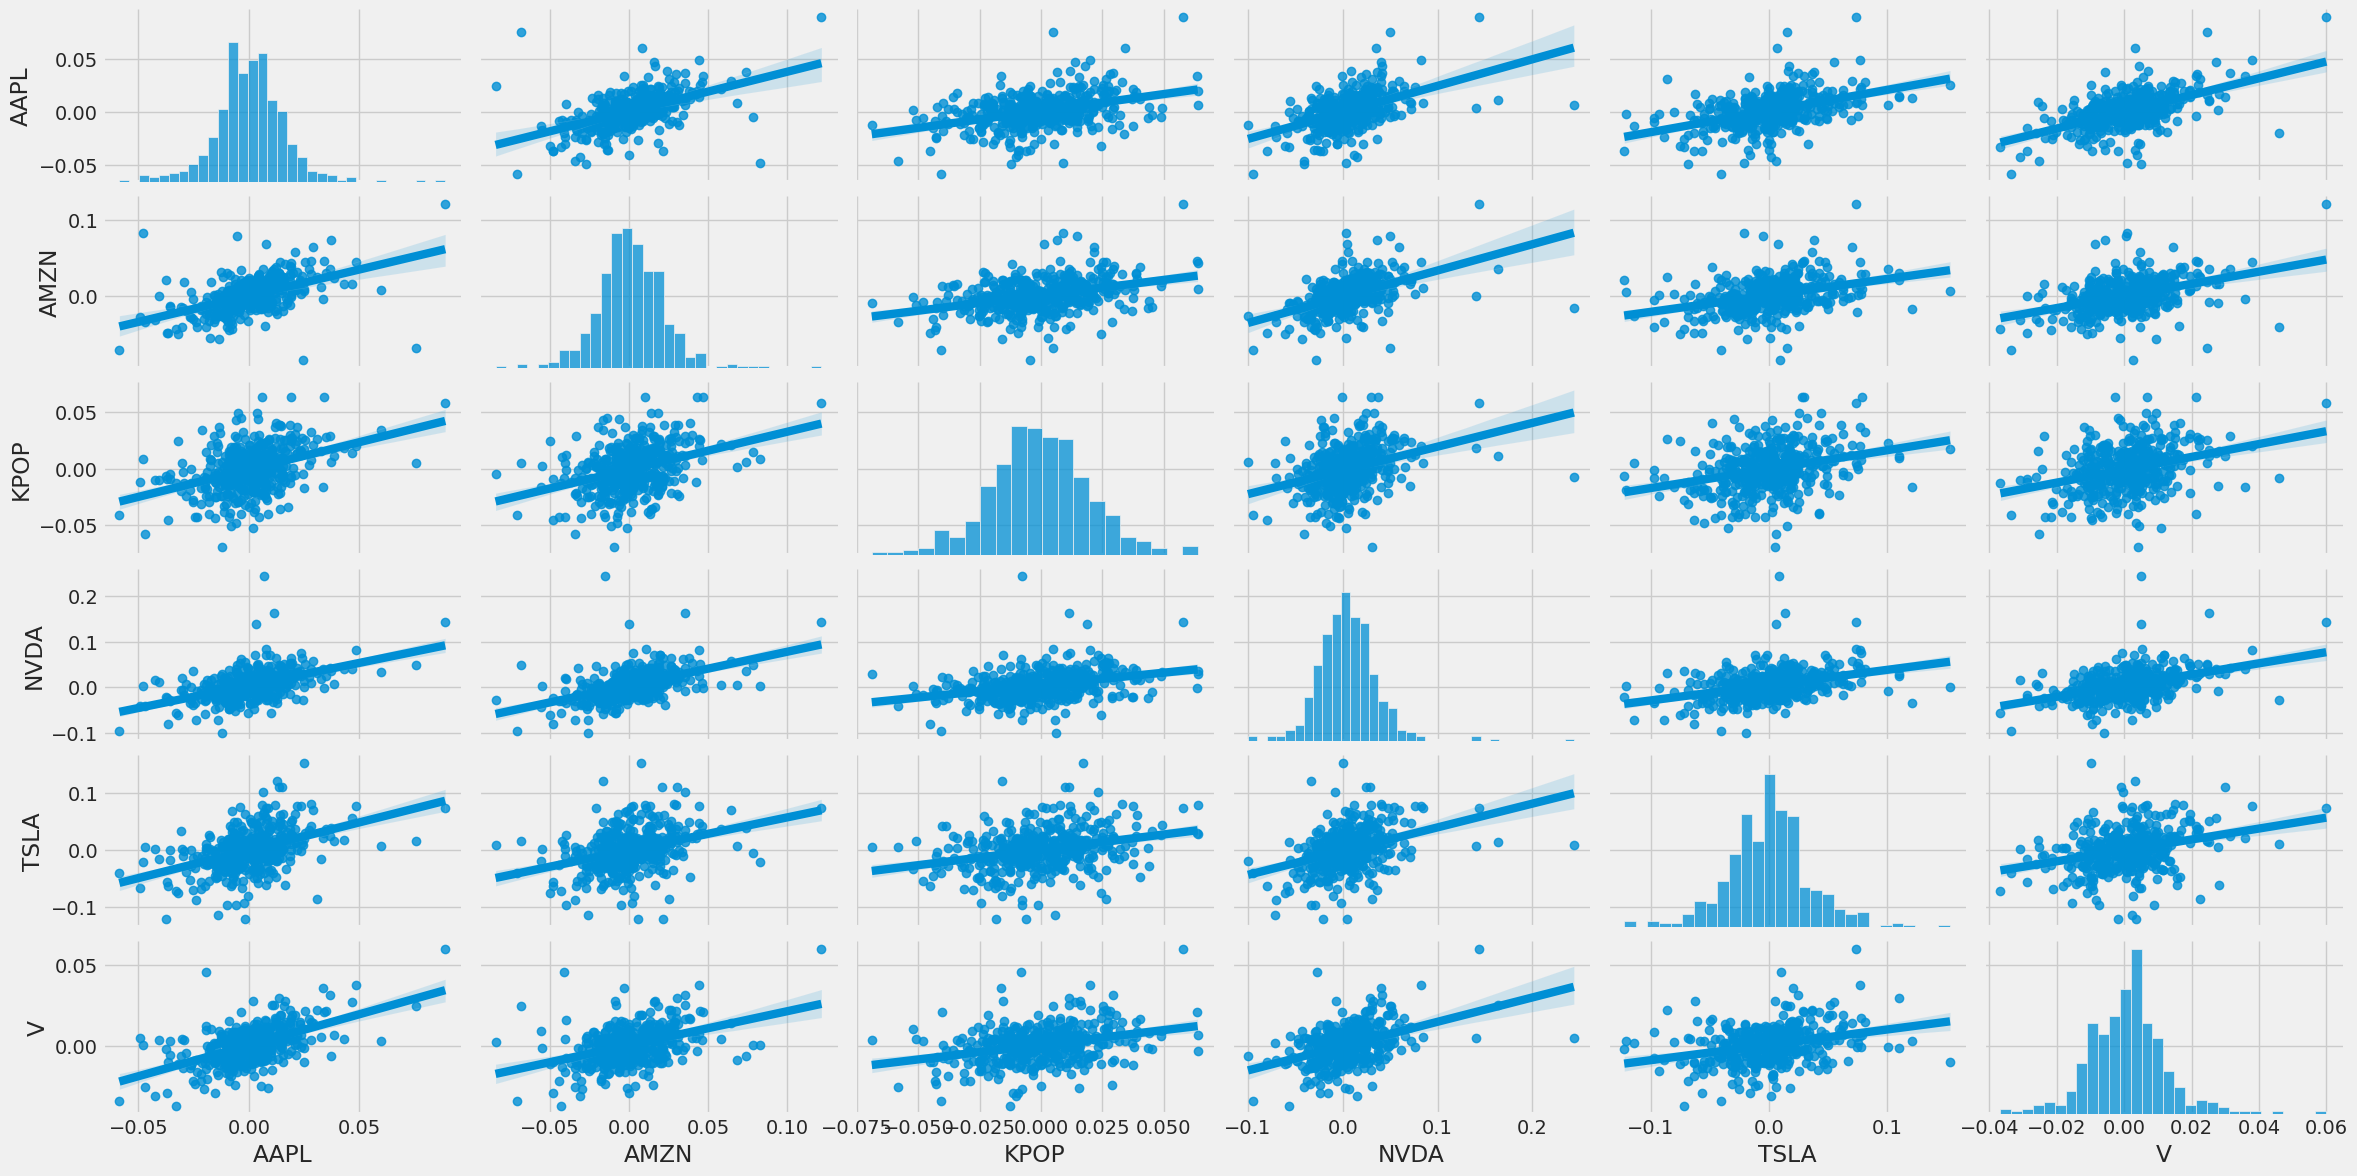

In [12]:
# Call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets.dropna(), kind='reg', height=2, aspect=2)

Text(0.5, 1.0, 'Correlation of stock closing price')

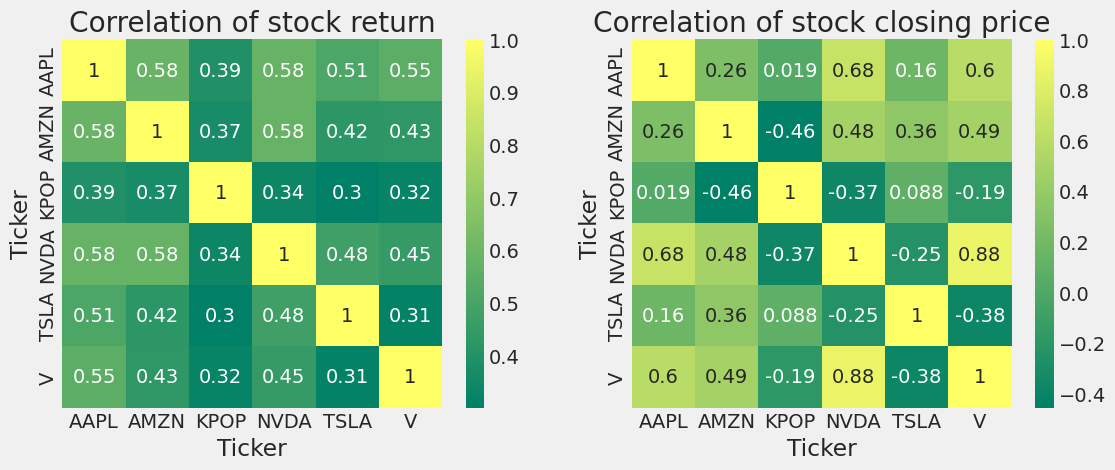

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

### 4. How much value do put at risk by investing in a particular stock?
- Using the information gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns

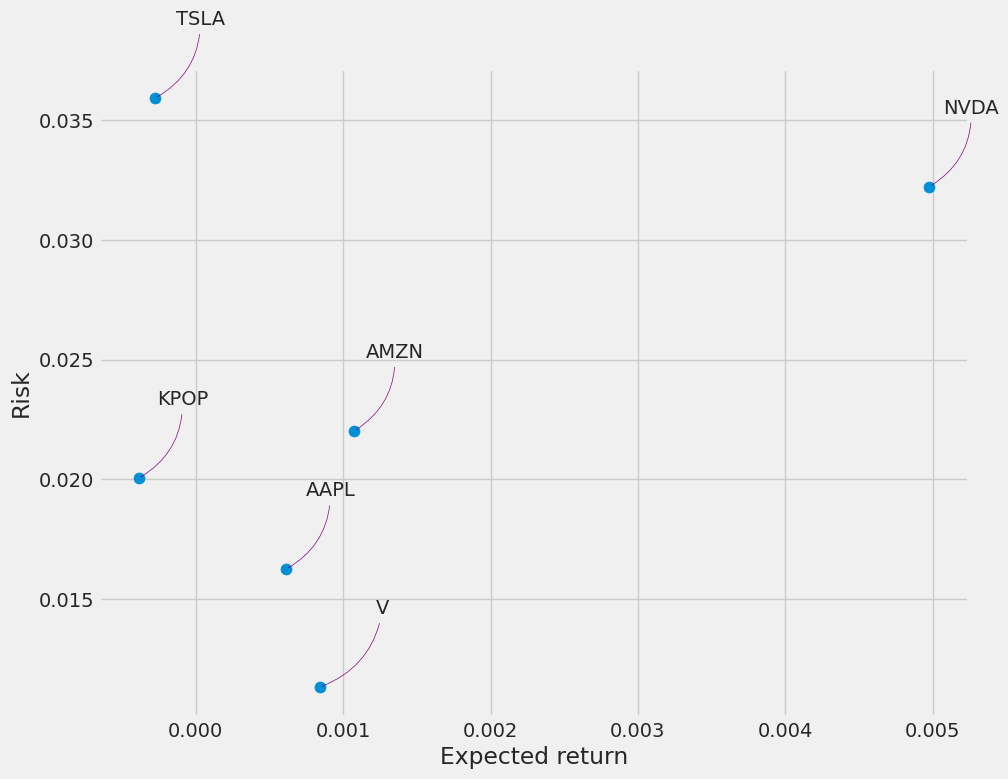

In [14]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='purple', connectionstyle='arc3,rad=-0.3'))

### 5. Prediction

- Data Preprocessing and Preparation

In [14]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates
from tensorflow.keras.layers import LSTM
from keras.layers import Dense
import keras.utils
from keras.utils import plot_model

In [15]:
# Download historical data from Yahoo Finance
stock = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Split data into training (2010-2020) and validation (2020-2023) sets
training_data   = stock['Adj Close']['2010-01-01':'2020-12-31']
validation_data = stock['Adj Close']['2021-01-01':'2023-01-01']

# Use 'Adj Close' prices as the stock price for training
training_set   = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [16]:
# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled   = sc.fit_transform(training_set)
validation_set_scaled = sc.transform(validation_set)

- Building and Training the LSTM Model

In [40]:
# Creating input sequences for training
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train           = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(validation_set_scaled)

# Reshape inputs for LSTM model
X_train      = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

In [25]:
# Creating input sequences for training
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train           = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(validation_set_scaled)

In [22]:
trainX        = np.array(training_set_scaled)
validationX   = np.array(validation_set_scaled)
X_train       = trainX.reshape(training_set_scaled.shape[0], 1, training_set_scaled.shape[1])
X_validation  = validationX.reshape(validationX.shape[0], 1, validationX.shape[1])

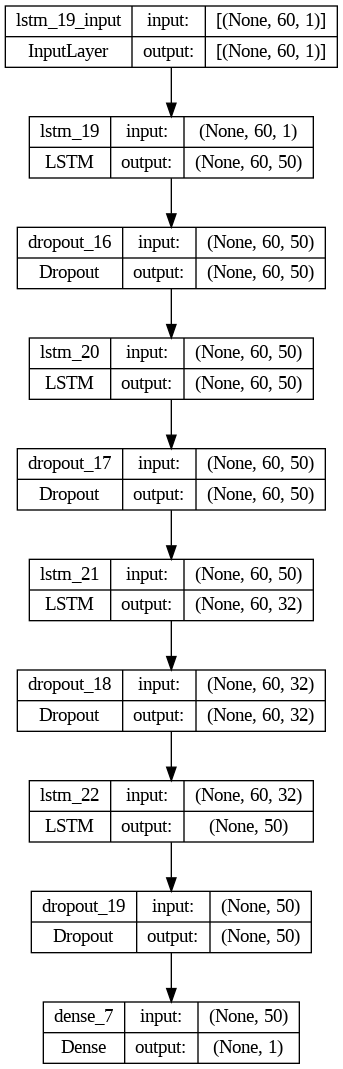

In [34]:
# Building the LSTM Model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=32, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))
plot_model(model, show_shapes=True, show_layer_names=True)

In [35]:
# Compiling the LSTM Model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the Model and store history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/100
85/85 [==============================] - 21s 143ms/step - loss: 0.0073 - val_loss: 0.0060
Epoch 2/100
85/85 [==============================] - 11s 125ms/step - loss: 0.0018 - val_loss: 0.0096
Epoch 3/100
85/85 [==============================] - 10s 116ms/step - loss: 0.0015 - val_loss: 0.0067
Epoch 4/100
85/85 [==============================] - 10s 116ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 5/100
85/85 [==============================] - 12s 142ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 6/100
85/85 [==============================] - 11s 126ms/step - loss: 0.0011 - val_loss: 0.0165
Epoch 7/100
85/85 [==============================] - 10s 118ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 8/100
85/85 [==============================] - 10s 113ms/step - loss: 0.0010 - val_loss: 0.0092
Epoch 9/100
85/85 [==============================] - 11s 129ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 10/100
85/85 [==============================] - 11s 132ms/step - loss: 0.001

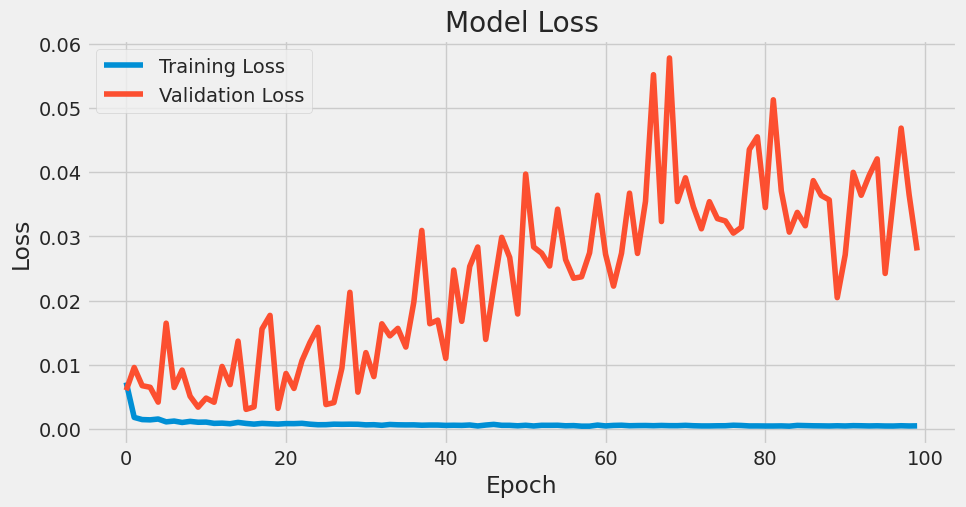

In [36]:
# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Application of Trained Model for Prediction

In [37]:
# Download test data from Yahoo Finance
stock_test = yf.download('AAPL', start='2023-01-01', end='2024-05-17')

# Use 'Adj Close' prices as the test data
real_stock_price = stock_test['Adj Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [45]:
# Preparing Test Data
dataset_total = pd.concat((stock['Adj Close'], stock_test['Adj Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(stock_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [46]:
# Making Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

11/11 [==============================] - 0s 29ms/step


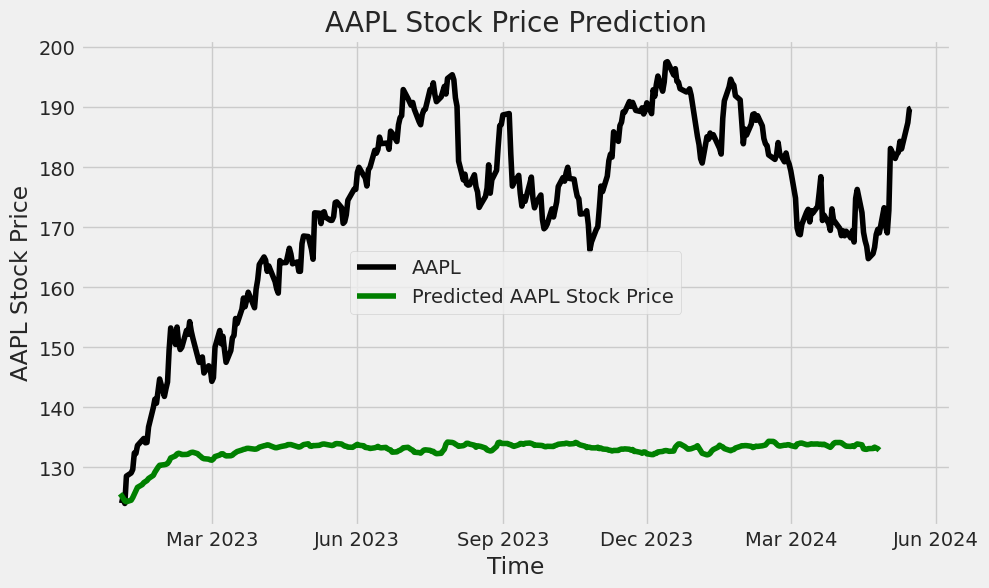

In [47]:
# Prepare dates for the predicted stock prices
stock_name = 'AAPL'
date_range = pd.date_range(start='2023-01-01', periods=len(predicted_stock_price), freq='B')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(stock_test.index, real_stock_price, color='black', label=f"{stock_name}")
plt.plot(date_range, predicted_stock_price, color='green', label=f'Predicted {stock_name} Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title(f'{stock_name} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{stock_name} Stock Price')
plt.legend()
plt.show()